In [1]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import make_blobs

/Users/it658/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


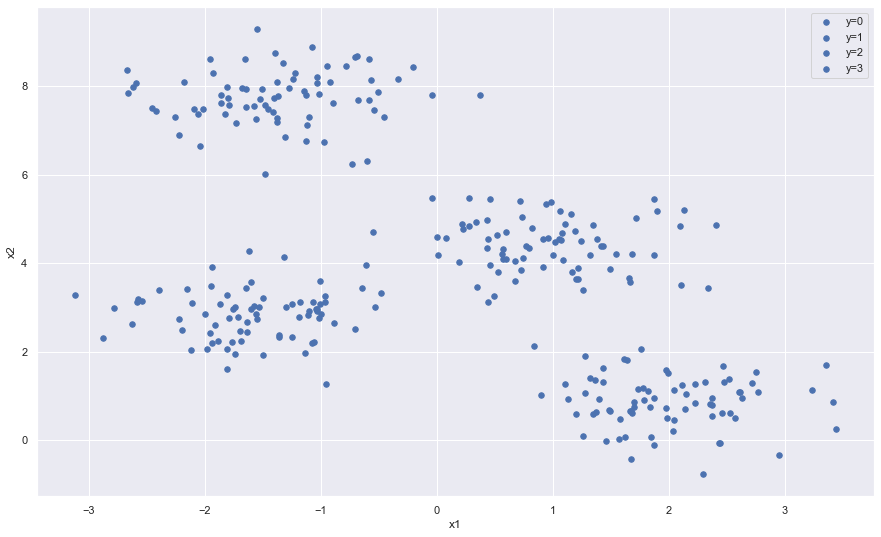

(300, 2)


In [2]:
# manually generate dataset

# use the make_blobs() function with n_samples=300,centers=4,cluster_std=0.6 and random_state=0
# store the return value to X and y_true
# plot the dataset using plt.scatter()

x, y_true = make_blobs(n_samples=300,centers=4,cluster_std=0.6, random_state=0)

idx_0 = np.where(y_true == 0)
idx_1 = np.where(y_true == 1)
idx_2 = np.where(y_true == 2)
idx_3 = np.where(y_true == 3)

plt.figure(figsize = (15,9))

plt.scatter(x[idx_0,0], x[idx_0,1], s=30, c='b', marker="o",label="y=0")
plt.scatter(x[idx_1,0], x[idx_1,1], s=30, c='b', marker="o",label="y=1")
plt.scatter(x[idx_2,0], x[idx_2,1], s=30, c='b', marker="o",label="y=2")
plt.scatter(x[idx_3,0], x[idx_3,1], s=30, c='b', marker="o",label="y=3")

plt.xlabel("x1")
plt.ylabel("x2")
plt.gca().legend()
plt.show()

print(x.shape)

In [3]:
# use sklearn api to visualize the clustering result.

# first create the Kmeans obejct 
# then fit the data
# finally, make prediction

def k_means(x, n_clusters, rseed, centerList=[]):
    
    if len(centerList)==0:
        
        r = np.random.RandomState(rseed)
        centerList = r.permutation(x)[:n_clusters]
        
    while True:
        
        labels = pairwise_distances_argmin(x, centerList)
        
        newCenterList = np.array([x[labels==i].mean(0) for i in range(n_clusters)])#looping over the whole n_clusters array
        centerList = newCenterList
        
        if np.all(centerList != newCenterList):
            centerList = newCenterList
        else:
            labels = pairwise_distances_argmin(x, centerList)
            break
            
            
    return centerList, labels

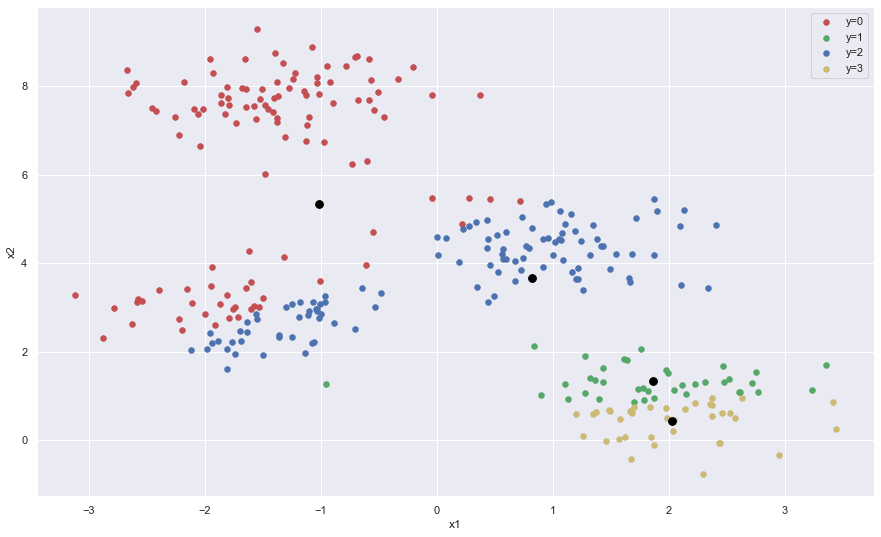

In [4]:
centerList, labels = k_means(x,4,0)

idx_0 = np.where(labels == 0)
idx_1 = np.where(labels == 1)
idx_2 = np.where(labels == 2)
idx_3 = np.where(labels == 3)

plt.figure(figsize = (15,9))

plt.scatter(x[idx_0,0], x[idx_0,1], s=30, c='r', marker="o",label="y=0")
plt.scatter(x[idx_1,0], x[idx_1,1], s=30, c='g', marker="o",label="y=1")
plt.scatter(x[idx_2,0], x[idx_2,1], s=30, c='b', marker="o",label="y=2")
plt.scatter(x[idx_3,0], x[idx_3,1], s=30, c='y', marker="o",label="y=3")

plt.scatter(centerList[0][0],centerList[0][1],s=60,c="0",marker="o")
plt.scatter(centerList[1][0],centerList[1][1],s=60,c="0",marker="o")
plt.scatter(centerList[2][0],centerList[2][1],s=60,c="0",marker="o")
plt.scatter(centerList[3][0],centerList[3][1],s=60,c="0",marker="o")

plt.xlabel("x1")
plt.ylabel("x2")
plt.gca().legend()
plt.show()


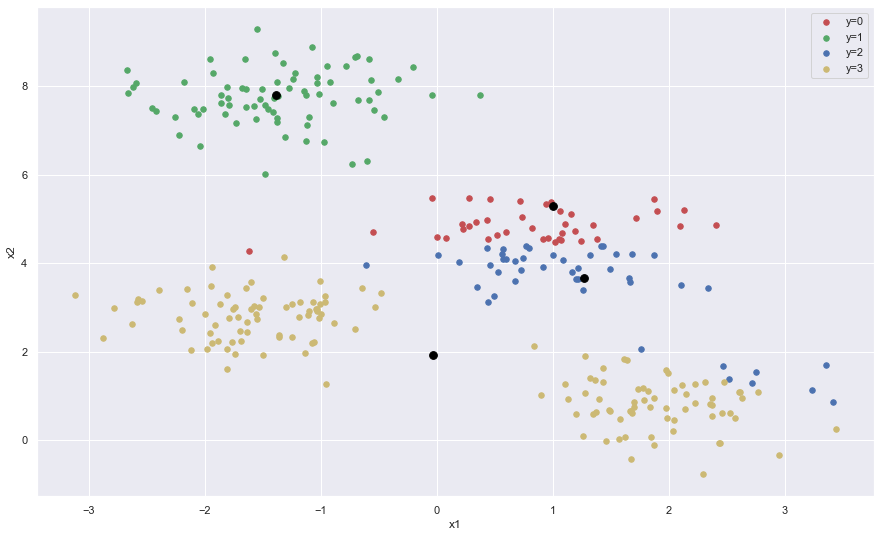

In [5]:
centerList, labels = k_means(x,4,2)

idx_0 = np.where(labels == 0)
idx_1 = np.where(labels == 1)
idx_2 = np.where(labels == 2)
idx_3 = np.where(labels == 3)

plt.figure(figsize = (15,9))

plt.scatter(x[idx_0,0], x[idx_0,1], s=30, c='r', marker="o",label="y=0")
plt.scatter(x[idx_1,0], x[idx_1,1], s=30, c='g', marker="o",label="y=1")
plt.scatter(x[idx_2,0], x[idx_2,1], s=30, c='b', marker="o",label="y=2")
plt.scatter(x[idx_3,0], x[idx_3,1], s=30, c='y', marker="o",label="y=3")

plt.scatter(centerList[0][0],centerList[0][1],s=60,c="0",marker="o")
plt.scatter(centerList[1][0],centerList[1][1],s=60,c="0",marker="o")
plt.scatter(centerList[2][0],centerList[2][1],s=60,c="0",marker="o")
plt.scatter(centerList[3][0],centerList[3][1],s=60,c="0",marker="o")

plt.xlabel("x1")
plt.ylabel("x2")
plt.gca().legend()
plt.show()

**Answer to question 6: Compare the results from 4 and 5. Is there any differences? If yes, why?**

The clusterings from 4 and 5 give very different results. I believe that this is due to the  different randomizations of the initial centers, so they did not converge to optimal clusters. 

In [6]:
def eucl_dist(a, b, axis=1):
    return np.array([np.min((np.sum((i-(a,b))**2)))for i in x])
#     def the function that calculate the l2 distance


# def the init function for kmean++:
# 
def init_center(k,x,rseed):
    r =  np.random.RandomState(rseed)
    firstDataPt = r.permutation(x.shape[0])[0:1]
    centerList = np.array(x[firstDataPt])
    
    while len(centerList) < k:
        dj = eucl_dist(centerList[-1][0], centerList[-1][1])
        pj = (dj**2)/np.sum(dj**2)
        
        randomNum = np.random.random()
        
        for i in range(len(pj)):
            cum = np.sum(pj[:i])
            if cum > randomNum:
                print(x[i])
                centerList = np.vstack((centerList,x[i]))
                break
                
    return centerList


In [7]:
# def the kmean++:
def kmpp(x, n_clusters,rseed):
    initCenters = init_center(n_clusters,x,rseed)
    centerList, labels = k_means(x,n_clusters,rseed,initCenters)
    
    return centerList, labels

[2.51834185 1.39176615]
[-1.65104622  3.44598961]
[-2.58043836  3.18844294]


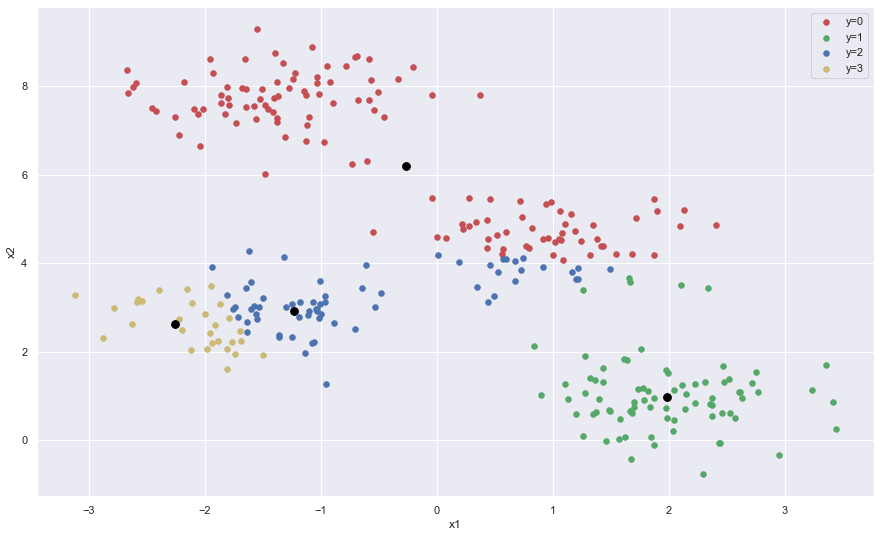

In [8]:
centerList, labels = kmpp(x,4,2)

idx_0 = np.where(labels == 0)
idx_1 = np.where(labels == 1)
idx_2 = np.where(labels == 2)
idx_3 = np.where(labels == 3)

plt.figure(figsize = (15,9))

plt.scatter(x[idx_0,0], x[idx_0,1], s=30, c='r', marker="o",label="y=0")
plt.scatter(x[idx_1,0], x[idx_1,1], s=30, c='g', marker="o",label="y=1")
plt.scatter(x[idx_2,0], x[idx_2,1], s=30, c='b', marker="o",label="y=2")
plt.scatter(x[idx_3,0], x[idx_3,1], s=30, c='y', marker="o",label="y=3")

plt.scatter(centerList[0][0],centerList[0][1],s=60,c="0",marker="o")
plt.scatter(centerList[1][0],centerList[1][1],s=60,c="0",marker="o")
plt.scatter(centerList[2][0],centerList[2][1],s=60,c="0",marker="o")
plt.scatter(centerList[3][0],centerList[3][1],s=60,c="0",marker="o")

plt.xlabel("x1")
plt.ylabel("x2")
plt.gca().legend()
plt.show()

[-1.95866665  2.43008647]
[1.37964693 4.54826443]
[-1.3621942   2.38333321]


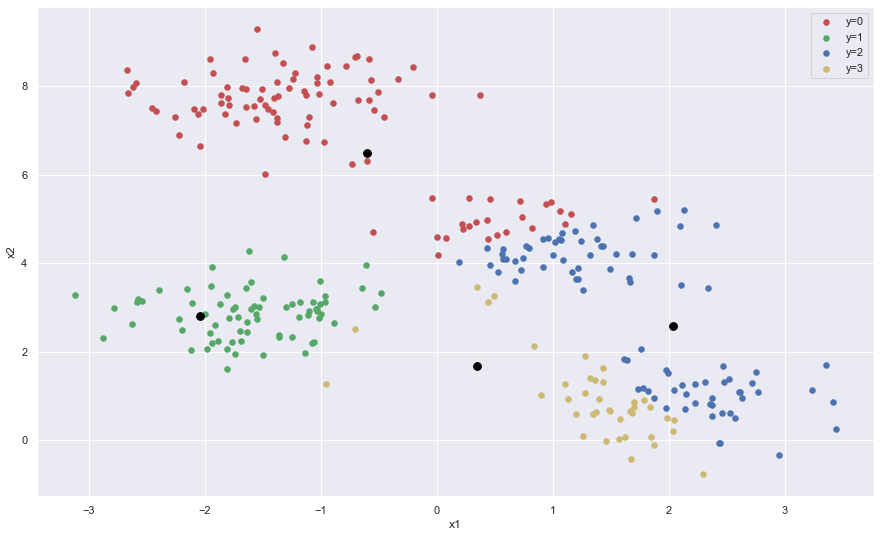

In [9]:
centerList, labels = kmpp(x,4,0)

idx_0 = np.where(labels == 0)
idx_1 = np.where(labels == 1)
idx_2 = np.where(labels == 2)
idx_3 = np.where(labels == 3)

plt.figure(figsize = (15,9))

plt.scatter(x[idx_0,0], x[idx_0,1], s=30, c='r', marker="o",label="y=0")
plt.scatter(x[idx_1,0], x[idx_1,1], s=30, c='g', marker="o",label="y=1")
plt.scatter(x[idx_2,0], x[idx_2,1], s=30, c='b', marker="o",label="y=2")
plt.scatter(x[idx_3,0], x[idx_3,1], s=30, c='y', marker="o",label="y=3")

plt.scatter(centerList[0][0],centerList[0][1],s=60,c="0",marker="o")
plt.scatter(centerList[1][0],centerList[1][1],s=60,c="0",marker="o")
plt.scatter(centerList[2][0],centerList[2][1],s=60,c="0",marker="o")
plt.scatter(centerList[3][0],centerList[3][1],s=60,c="0",marker="o")

plt.xlabel("x1")
plt.ylabel("x2")
plt.gca().legend()
plt.show()

**Answer to question 10: Compare the results from 8 and 9. Is there any differences? If yes, why?**

The clusterings from 8 and 9 give relatively same results. K-means++ is relatively consistent within clusters, with the specific data points selected as initial centroids varying slightly, and they are further away from each other.

**Answer to question 11: Compare the results from 4,5,8 and 9. State your observations.**

When comparing the results, we can notice that K-means++ removes the dependency of K-means on the initialization of the centers and we get centroids which are far away from each other. 